In [1]:
from ecell4 import *
%matplotlib inline
import numpy as np
import math
import sys
from math import sqrt
import matplotlib.pyplot as plt
from ecell4.extra import ensemble
import numpy as np

In [2]:
import glob
import os.path

L=6.421324129676528
NB=500
NA=int(0.05*NB)
print(NA,NB,NB/L/L)

def ldata(kf,name):
    kf=str(kf)
    patterns='/home/chew/outputdata/2DRD/'+name+'/kf'+kf+'K1/run*'
    fns=glob.glob(patterns)
    data = None
    for i, filename in enumerate(fns):
        #print('[{}/{}] {}'.format(i + 1, len(fns), filename))
        if data is None:
            data = np.loadtxt(filename, delimiter=',')
        else:
            data += np.loadtxt(filename, delimiter=',')
    print(len(fns))
    data/=len(fns)  
    time = data.T[0]
    SP = data.T[1] / NA
    return time,SP

25 500 12.126090902239648


In [3]:
#t5o,s5o=ldata(5,'oriP')
#t500o,s500o=ldata(500,'oriP')
#t5n,s5n=ldata(5,'newP')
#t500n,s500n=ldata(500,'newP')
t01o,s01o=ldata(0.1,'oriP')
t10o,s10o=ldata(10,'oriP')
t01n,s01n=ldata(0.1,'newP')
t10n,s10n=ldata(10,'newP')

300
300
300
300


(0.1, 2)

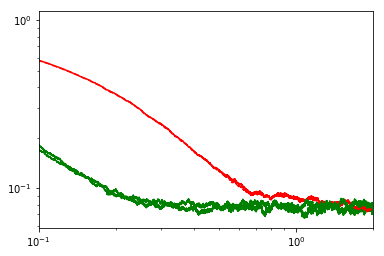

In [26]:
plt.plot(t01n,s01n,'r-')
plt.semilogx(t10n,s10n,'g-')
plt.plot(t01o,s01o,'r--')
plt.loglog(t10o,s10o,'g--')
plt.xlim(1e-1,2)

In [52]:
voxelr=0.005
H = 3*voxelr*2
w = spatiocyte.SpatiocyteWorld(Real3(H,L,L),voxelr)
lx,ly,lz=w.actual_lengths()
Area= ly*lz
size=tuple(w.calculate_shape(Real3(H,L,L),voxelr))
#print([s*voxelr*2 for s in size])
Nmv=size[1]*size[2]    
N=NA+NB
print('philB={}%'.format(NB*100/Nmv))
print('philA={}%'.format(NA*100/Nmv))
#Area=Nmv*(2*voxelr)**2
c0=NB/Area
#c0=NB/L/L
print('c0',c0)

philB=0.10463578376387471%
philA=0.0052317891881937355%
c0 12.082299584588107


In [6]:
sqrt(1000*N*math.pi*voxelr*voxelr)

6.421324129676529

In [57]:
#tp5,sp5=(np.loadtxt('/home/chew/outputdata/Fig.surface.reversible.kd5.mpk1.csv',delimiter=',')).T
#tp500,sp500=(np.loadtxt('/home/chew/outputdata/Fig.surface.reversible.kd500.mpk1.csv',delimiter=',')).T
#created using octave
TT01,ST01=(np.loadtxt('/home/chew/outputdata/mpk1kf01K1.csv',delimiter=',')).T
TT10,ST10=(np.loadtxt('/home/chew/outputdata/mpk1kf10K1.csv',delimiter=',')).T

In [63]:
TT01

array([1.00000000e-05, 1.00462042e-05, 1.00926219e-05, ...,
       9.86265846e-01, 9.93109181e-01, 1.00000000e+00])

ori,kf=0.1,Sinf=0.076,Sim=0.079,diff=-3.09%
new,kf=0.1,Sinf=0.076,Sim=0.078,diff=-2.39%
ori,kf=10,Sinf=0.076,Sim=0.077,diff=-0.47%
new,kf=10,Sinf=0.076,Sim=0.073,diff=5.11%


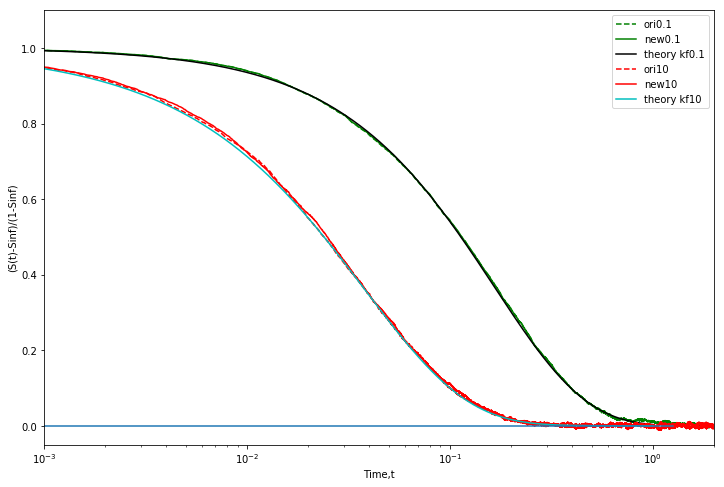

In [67]:
fig,ax=plt.subplots(1,1,figsize=(12,8))

def er(a,b):
    return (a-b)*100/a

def plotg(kf,c,x,y,name):
    sinf=1/(1+c)
    print('{},kf={},Sinf={:.3f},Sim={:.3f},diff={:.2f}%'.format(name,kf,sinf,y[-1],er(sinf,y[-1])))
    yp=(y-sinf)/(1-sinf)
    if kf==10: clr='r'
    else: clr='g'
    if name=='ori':
        ax.semilogx(x,yp,clr+'--',label=name+str(kf))
    elif name=='new':
        ax.semilogx(x,yp,clr+'-',label=name+str(kf))    
    else:
        ax.semilogx(x,yp,clr+'-.',label=name+str(kf))
plotg(0.1,c0,t01o,s01o,'ori')
plotg(0.1,c0,t01n,s01n,'new')
ax.plot(TT01,ST01,'k-',label='theory kf0.1')

plotg(10,c0,t10o,s10o,'ori')
plotg(10,c0,t10n,s10n,'new')
plt.semilogx(TT10,ST10,'c-',label='theory kf10')

plt.plot(np.logspace(-5,0.1,10),[0]*10)
plt.ylim(-0.05,1.1)
plt.xlim(1e-3,2)
plt.ylabel('(S(t)-Sinf)/(1-Sinf)')
plt.xlabel('Time,t')

plt.legend()

In [9]:
math.log(0.3)/math.log(10)

-0.5228787452803376

In [10]:
math.log(10)

2.302585092994046

In [11]:
10**-3,10**-3.1

(0.001, 0.0007943282347242813)

In [12]:
g=0.57721566
K=ka/D
p= 1./(1+(sqrt(3)/2/pi)*(log(f*f/12)+(2/K)-2*g))

0.36084391824351614

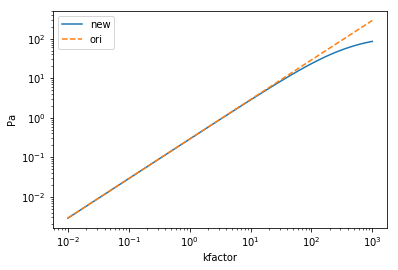

In [85]:
import numpy as np
from numpy import sqrt,pi,log
g=0.57721566
A=sqrt(3)/2/pi
#K=ka/D
factor = (2 * sqrt(2.0) + 4 * sqrt(3.0) + 3 * sqrt(6.0) + sqrt(22.0))**2/(72 * (6 * sqrt(2.0) + 4 * sqrt(3.0) + 3 * sqrt(6.0)))
p=lambda f,K: 1./(1+A*(log(f*f/12)+(4*math.pi/K)-2*g))
po=lambda K: K*factor
xs=np.logspace(-2,3,100)
ynew = p(1.021,xs)
yori = po(xs)
plt.semilogx(xs,ynew,label='new')
plt.loglog(xs,yori,'--',label='ori')
plt.xlabel('kfactor')
plt.ylabel('Pa')
plt.legend()

(1.3, 1.1547005383792517)

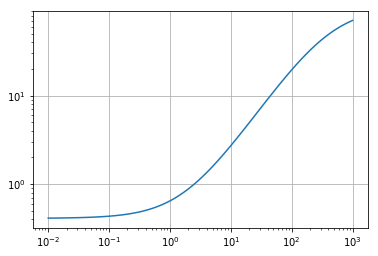

In [101]:
plt.loglog(xs,(yori-ynew)*100/yori)
plt.grid(True)
1.3,2/math.sqrt(3)

-0.04071309551331892

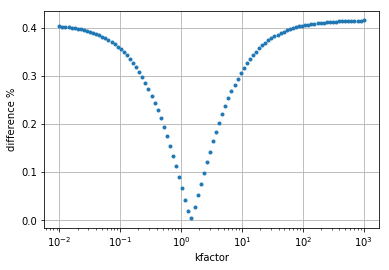

In [125]:
Cl = lambda pa,l: 1./np.log(48*np.exp((1./pa-1)*2/math.sqrt(3))/l)
cnew = Cl(ynew,1.021)
cori = Cl(yori,1) 
diff = abs(cnew-cori)*100/cori
plt.semilogx(xs,diff,'.')
plt.xlabel('kfactor')
plt.ylabel('difference %')
plt.grid(True)
1/1.021**2-1

62.83185307179586

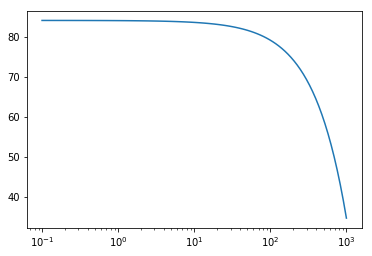

In [53]:
dif = [abs(x-y)*100/x for x,y in zip(p(1.009,xs),po(xs))]
plt.semilogx(xs,dif)
2*pi*10

[11741.64649697  8433.14016551  6579.3531105   5393.75964181
  4570.25392729  3964.93435726  3501.23232345  3134.65436427
  2837.57873174  2591.9507673   2385.47090311  2209.47080113
  2057.66539229  1925.38648563  1809.09424576  1706.05569929
  1614.12723606  1531.60386646  1457.11249409  1389.53490557
  1327.95125208  1271.59793132  1219.8357637   1172.12564212
  1128.00968505  1087.09649426  1049.04951102  1013.5777365
   980.42827491   949.38029466   920.24010282   892.83710043
   867.02044027   842.65624871   819.62530371   797.82108372
   777.14812044   757.52060133   738.861179     721.0999525
   704.17359226   688.02458563   672.60058398   657.85383584
   643.74069311   630.22117956   617.25861264   604.81927116
   592.87210234   581.38846298   570.34189022   559.70789791
   549.46379545   539.58852619   530.06252289   520.86757841
   511.98672947   503.40415226   495.10506833   487.07565967
   479.30299194   471.77494493   464.48014951   457.40793033
   450.5482537    443.8916

Text(0,0.5,'Pa')

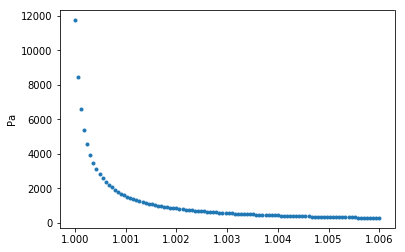

In [51]:
fs=np.linspace(1,1.006,100)
K=166
y=p(fs,K)
print(y)
plt.plot(fs,y,'.')
plt.ylabel('Pa')

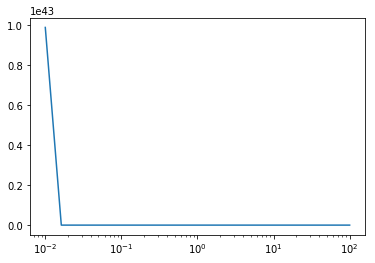

In [107]:
pp=np.logspace(-2,2,20)
plt.semilogx(pp,np.exp(1./pp-1))

In [39]:
1/0.006

166.66666666666666

In [85]:
math.exp(-3)

0.049787068367863944

In [86]:
-math.log(12)-2*g

-3.6393379697880004

In [89]:
1./0.1

10.153922082272256

In [3]:
import math
#C=2*g+log(12)-2*pi/sqrt(3)
#C-2*log(1.021)
math.exp(0.0058696)

1.0058868598550375

In [2]:
import math